# 组合与计数时间序列

# 预测成分时间序列

## Example 16.1

在前面的章节中， 我们考虑到时间序列通常没有任何限制，除了它们有一 个自然的下界，这通常是零。然而，有一些级数或级数的组受到进一步的 约束。在对这样的序列建模时，一个 “好的”模型应该不能预测违反已知 约束的值， 也就是说，这个模型应该是 “ 预测一致的 ” 。“本章考虑这类 级数的两个例子:(1)复合时间序列，其中一组级数被定义为一个整体的份额， 因此它们必须是加起来等于一的正分数 ;(2)“计数”时间序列只能取正的、 通常较低的整数值。

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

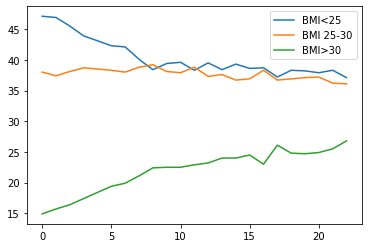

In [77]:
df=pd.read_excel("/root/experiment01/x1.xlsx")
x1=np.array(df["x1"])
x2=np.array(df["x2"])
x3=np.array(df["x3"])
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.legend(['BMI<25',"BMI 25-30","BMI>30"])
plt.show()

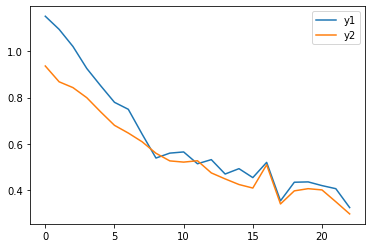

In [78]:
y1 = np.log(x1/x3)
y2 = np.log(x2/x3)
plt.plot(y1)
plt.plot(y2)
plt.legend(["y1","y2"])
plt.show()
y1=pd.Series(y1).dropna()
y2=pd.Series(y2).dropna()


In [79]:
len(y1)

23

In [80]:
x1=np.array(range(len(y1)))
X=np.column_stack(((x1), (x1)**2, (x1)**3))

import statsmodels.api as sm
olsmod1 = sm.OLS(y1, X)
olsres1 = olsmod1.fit()
print(olsres1.summary())
olsmod2 = sm.OLS(y2, X)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                              17.16
Date:                Thu, 13 Aug 2020   Prob (F-statistic):                    9.41e-06
Time:                        18:11:12   Log-Likelihood:                         -8.5158
No. Observations:                  23   AIC:                                      23.03
Df Residuals:                      20   BIC:                                      26.44
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
x2=np.array(range(len(y1)+5))
X2=np.column_stack(((x2), (x2)**2, (x2)**3))
y1_f = olsres1.predict(X2)
y2_f= olsres2.predict(X2)

In [73]:
x1_f = 100*np.exp(y1_f)/(1 + np.exp(y1_f) + np.exp(y2_f))
x2_f = 100*np.exp(y2_f)/(1 + np.exp(y1_f) + np.exp(y2_f))
x3_f = 100 -x1_f - x2_f

# 预测计数序列

# Example 16.2

In [81]:
df=pd.read_excel("/root/experiment01/cons_share.xlsx")
x=np.array(df["other_share"])
c=np.array(df["cons_share"])
g=np.array(df["govt_share"])
i=np.array(df["inv_share"])

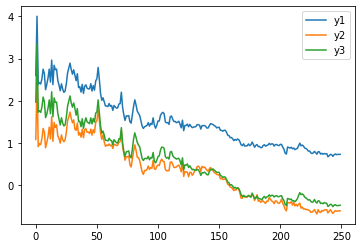

In [88]:
y1 = np.log(c/x)
y2 = np.log(i/x)
y3 = np.log(g/x)
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.legend(["y1","y2","y3"])
plt.show()
y1=pd.Series(y1).dropna()
y2=pd.Series(y2).dropna()
y3=pd.Series(y3).dropna()

In [89]:
endog=np.column_stack((y1, y2, y3))

In [90]:
from statsmodels.tsa.api import VAR
model = VAR(endog)
results = model.fit(3)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, Aug, 2020
Time:                     18:38:31
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -19.4086
Nobs:                     247.000    HQIC:                  -19.6632
Log likelihood:           1428.16    FPE:                2.43171e-09
AIC:                     -19.8348    Det(Omega_mle):     2.15875e-09
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.221553         0.113086            1.959           0.050
L1.y1         0.559874         0.575851            0.972           0.331
L1.y2         0.033983         0.261057            0.130           0.896
L1.y3         0.204065

# Example 16.3

In [91]:
df=pd.read_excel("/root/experiment01/storms.xlsx")
df.head()

,_date_,storms,hurricanes
0,NaT,6,3
1,NaT,5,5
2,NaT,8,4
3,NaT,5,3
4,NaT,5,4


In [93]:
x=np.array(df["storms"])
r1 = 0.384
r2 = 0.300
phi2 = 0.179
score = np.sqrt(x)*r1
y = x -np.mean(x)
s = np.sum(y)

y2 = pd.Series(x).shift(-2) - np.mean(x)
y1 = y*y2
s1 = np.sum(y1)
qacf = (r2**2)*(s**2)/s1
qpacf = (phi2**2)*(s**2)/s1


In [ ]:
# In-AR

In [97]:
r1 = 0.384
r2 = 0.300
a = (x*r1 + 1)/(x - 3)
l1 = (1 - a)*np.mean(x)
a1 = r1*(1 - r2)/(1 - r1**2)
a2 = (r2 - r1**2)/(1 - r1**2)
l2 =  (1 - a1 -a2)*np.mean(x)
w1 = x - a*pd.Series(x).shift(-1) - l1
w2 = x - a1*pd.Series(x).shift(-1) - a2*pd.Series(x).shift(-1) - l2

/root/anaconda3/envs/jupyter_notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


# Example 16.4

In [98]:
from math import factorial

In [1]:
a = 0.397
lam = 5.78
xt = 17
x_max = 25
x_max_1 = x_max + 1
c=np.zeros(x_max)
b=np.zeros((x_max,x_max))
p=np.zeros((2,x_max_1))

for i in [1,2]:
    h = i
    for j in range(x_max):
        z = j
        c.append(0)
        for k in range(z):
            b[z][k] = (a**(k*h))*((1-(a**h))^(xt-k)*(lam**(z*k))/(factorial(k)*factorial(z-k)*factorial(abs(xt-k)))
            c[z] = c[z] + b[z][k] 
            
        scalar p[h][z] = factorial(xt)*exp(-lam*(1-(a**h))/(1-a)))*c[z]         
    for f in range(x_max_1):
        w = f - 1
        #smpl !5 !5
        p[h] = p[h][w]
        




SyntaxError: invalid syntax (<ipython-input-1-dd7bf2c56297>, line 15)